# Swamy_Meghana_HW5

Name:Meghana Putta Swamy 

Github Username: meghanaswamy1995

USC ID: 6565038173

In [1]:
import math
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb
import xgboost as xgb
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, r2_score
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, LassoCV
from beautifultable import BeautifulTable 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore') 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import seaborn as sns
from sklearn import tree
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import KFold
import pprint
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from skmultilearn.problem_transform import LabelPowerset
from sklearn.metrics import auc, classification_report

In [2]:
def printDatainTable(tableHeaders, tableData):
    table = BeautifulTable(max_width=100)
    table.set_style(BeautifulTable.STYLE_SEPARATED)
    if len(tableHeaders)!=0:
        table.column_headers = tableHeaders
    for i in range(0, len(tableData)):
        table.append_row(tableData[i]) 
    print(table)

# 1. Accute inflamations data

# 1. (b) Build a decision tree on the whole data and plot

In [3]:
INFLAMMATION_DATA = '../data/diagnosis.data'

In [4]:
def get_data_file_col_name(filename): 
    if "diagnosis" in filename:
        return ["Temperature", "Nausea", "Lumbar_pain", "Urine_pushing", "Micturition_pains", "Burning_of_urethra", "Inflammation", "Nephritis"]
    #Temperature", "Nausea", "Lumbar_pain", "Urine_pushing", "Micturition_pains", "Burning_of_urethra", "Inflammation"])


In [5]:
df = pd.read_csv(INFLAMMATION_DATA, sep='\s+', encoding='UTF_16', header=None, decimal=',')
df.columns = get_data_file_col_name(INFLAMMATION_DATA)

In [6]:
def get_numeric_labelled_ds(df):
    cols = get_data_file_col_name(INFLAMMATION_DATA)
    for col in cols:
        df.loc[df[col] == 'no', col] = 0
        df.loc[df[col] == 'yes', col] = 1
    return df

In [7]:
def get_data_X_Y_split(df):
    dataX = df.iloc[:, :-2]
    dataY1 = df.iloc[:, -2:-1]
    dataY2 = df.iloc[:, -1:]
    dataY1 = dataY1.astype('int')
    dataY2 = dataY2.astype('int')
    return dataX, dataY1, dataY2

In [8]:
df = get_numeric_labelled_ds(df)


In [9]:
trainX, trainY1, trainY2 = get_data_X_Y_split(df)
print("Shape for trainX: ", trainX.shape)
print("Shape for trainY1: ", trainY1.shape)
print("Shape for trainY2: ", trainY2.shape)

Shape for trainX:  (120, 6)
Shape for trainY1:  (120, 1)
Shape for trainY2:  (120, 1)


In [10]:
def get_decision_tree_text_representation_and_plot(dataX, dataY):
    classifier = DecisionTreeClassifier(random_state=50)
    model = classifier.fit(dataX, dataY)
    text = tree.export_text(classifier)
    print("=======| DECISION TREE: TEXT REPRESENTATION |=======")
    print(text)
    
    print("=======| DECISION TREE: PLOT |=======")
    tree.plot_tree(classifier, filled=True)
    return classifier

=======| DECISION TREE: TEXT REPRESENTATION |=======
|--- feature_3 <= 0.50
|   |--- class: 0
|--- feature_3 >  0.50
|   |--- feature_4 <= 0.50
|   |   |--- feature_0 <= 37.95
|   |   |   |--- class: 1
|   |   |--- feature_0 >  37.95
|   |   |   |--- class: 0
|   |--- feature_4 >  0.50
|   |   |--- class: 1

=======| DECISION TREE: PLOT |=======


DecisionTreeClassifier(random_state=50)

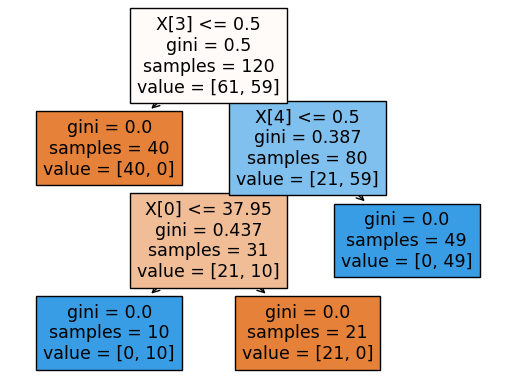

In [11]:
get_decision_tree_text_representation_and_plot(trainX, trainY1)

=======| DECISION TREE: TEXT REPRESENTATION |=======
|--- feature_0 <= 37.95
|   |--- class: 0
|--- feature_0 >  37.95
|   |--- feature_2 <= 0.50
|   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- class: 1

=======| DECISION TREE: PLOT |=======


DecisionTreeClassifier(random_state=50)

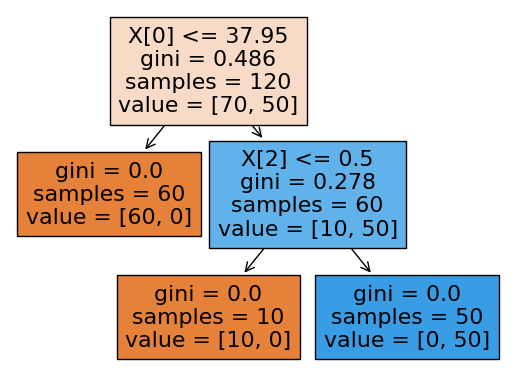

In [12]:
get_decision_tree_text_representation_and_plot(trainX, trainY2)

=======| DECISION TREE: TEXT REPRESENTATION |=======
|--- feature_0 <= 37.95
|   |--- feature_3 <= 0.50
|   |   |--- class: 0
|   |--- feature_3 >  0.50
|   |   |--- class: 1
|--- feature_0 >  37.95
|   |--- feature_2 <= 0.50
|   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- feature_4 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_4 >  0.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: 0

=======| DECISION TREE: PLOT |=======


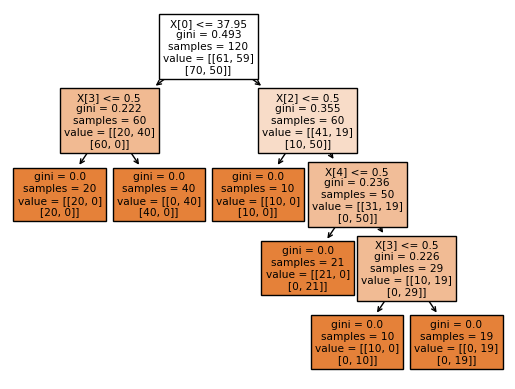

In [13]:
trainX = df.iloc[:, 0:6]
trainY = df.iloc[:, 6:]
trainY = trainY.astype('int')

classifier = get_decision_tree_text_representation_and_plot(trainX, trainY)

# 1. (c) Convert the decision rules into a set of IF-THEN rules

In [14]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print(f"{indent}if {name} <= {threshold}:")
            recurse(tree_.children_left[node], depth + 1)
            print(f"{indent}else:  # if {name} > {threshold}")
            recurse(tree_.children_right[node], depth + 1)
        else:
            print(f"{indent}return {tree_.value[node]}")

    recurse(0, 1)

In [15]:
tree_to_code(classifier, df.columns[0:6])

def tree(Temperature, Nausea, Lumbar_pain, Urine_pushing, Micturition_pains, Burning_of_urethra):
  if Temperature <= 37.95000076293945:
    if Urine_pushing <= 0.5:
      return [[20.  0.]
 [20.  0.]]
    else:  # if Urine_pushing > 0.5
      return [[ 0. 40.]
 [40.  0.]]
  else:  # if Temperature > 37.95000076293945
    if Lumbar_pain <= 0.5:
      return [[10.  0.]
 [10.  0.]]
    else:  # if Lumbar_pain > 0.5
      if Micturition_pains <= 0.5:
        return [[21.  0.]
 [ 0. 21.]]
      else:  # if Micturition_pains > 0.5
        if Urine_pushing <= 0.5:
          return [[10.  0.]
 [ 0. 10.]]
        else:  # if Urine_pushing > 0.5
          return [[ 0. 19.]
 [ 0. 19.]]


# 1. (d) cost-complexity pruning

In [16]:
def get_parameters_for_pruning():
    ans = []
    for i in range(10):
        ans.append((i + 1)//10 ) 
    return ans

In [17]:
def get_best_score_and_params():
    parameters = {'max_depth': get_parameters_for_pruning()}
    classifier = GridSearchCV(DecisionTreeClassifier(random_state=50), parameters)
    classifier.fit(trainX, trainY)
    accurate_model = classifier.best_estimator_
    return {
        'best_score': round(classifier.best_score_, 4), 
        'best_params': classifier.best_params_,
        'accurate_model': accurate_model
    }

In [18]:
best_score_and_params_with_accurate_model = get_best_score_and_params()
best_score = best_score_and_params_with_accurate_model['best_score']
best_params = best_score_and_params_with_accurate_model['best_params']
accurate_model = best_score_and_params_with_accurate_model['accurate_model']
print(f"Best Score is {best_score}")
print(f"Best Params are {best_params}") 

Best Score is 0.5417
Best Params are {'max_depth': 1}


In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(trainX, trainY, test_size=0.20)

Train Accuracy = 1.0
Test Accuracy = 1.0


[Text(0.4, 0.9, 'X[0] <= 37.95\ngini = 0.496\nsamples = 96\nvalue = [[46, 50]\n[54, 42]]'),
 Text(0.2, 0.7, 'X[3] <= 0.5\ngini = 0.212\nsamples = 46\nvalue = [[14, 32]\n[46, 0]]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 14\nvalue = [[14, 0]\n[14, 0]]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 32\nvalue = [[0, 32]\n[32, 0]]'),
 Text(0.6, 0.7, 'X[2] <= 0.5\ngini = 0.365\nsamples = 50\nvalue = [[32, 18]\n[8, 42]]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 8\nvalue = [[8, 0]\n[8, 0]]'),
 Text(0.7, 0.5, 'X[4] <= 0.5\ngini = 0.245\nsamples = 42\nvalue = [[24, 18]\n[0, 42]]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 17\nvalue = [[17, 0]\n[0, 17]]'),
 Text(0.8, 0.3, 'X[3] <= 0.5\ngini = 0.202\nsamples = 25\nvalue = [[7, 18]\n[0, 25]]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 7\nvalue = [[7, 0]\n[0, 7]]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 18\nvalue = [[0, 18]\n[0, 18]]')]

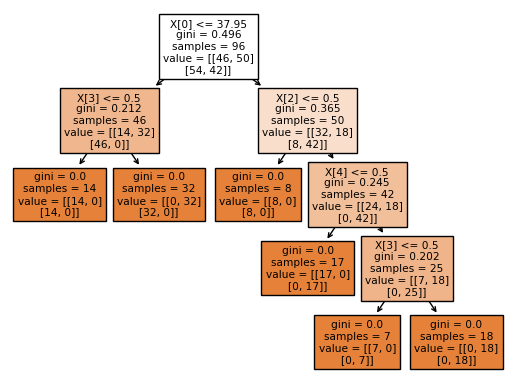

In [20]:
best_alpha=0.0
best_classifier = DecisionTreeClassifier(random_state=50, ccp_alpha=best_alpha)
best_c = LabelPowerset(best_classifier)
best_classifier.fit(X_train, Y_train)
Y_train_pred = best_classifier.predict(X_train)
Y_test_pred = best_classifier.predict(X_test)

print(f"Train Accuracy = {accuracy_score(Y_train, Y_train_pred)}")
print(f"Test Accuracy = {accuracy_score(Y_test, Y_test_pred)}")
tree.plot_tree(best_classifier, filled=True)

In [21]:
def get_decision_rules_with_high_interpretability():
    features = ['temperature', 'nausea_occurence', 'lumbar_pain', 'urine_pushing', 'micturition_pains', 'burning_urethra']
    features_d1_d2 = ['inflammation_pred', 'nephritis_pred']
    dot_data = tree.export_graphviz(accurate_model, out_file=None, 
                                    feature_names=features,  
                                    class_names=features_d1_d2,
                                    filled=True)
    tree.plot_tree(accurate_model)
    return features

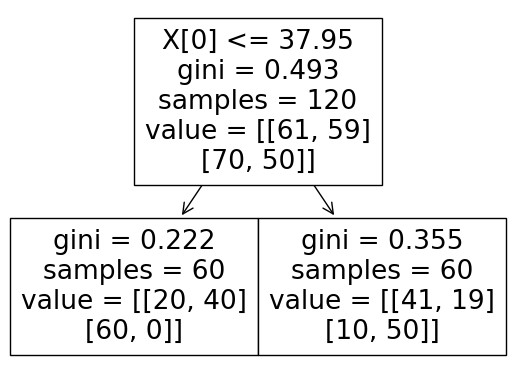

In [22]:
# DOT Data
features = get_decision_rules_with_high_interpretability()

# 

# 2. The LASSO and Boosting for Regression

In [23]:
communityURL = '../data/communities.data' 
variablesURL = "../data/communities_names.txt"

variables = pd.read_csv(variablesURL, header=None)
variables = np.array(variables).flatten()
features = variables[:len(variables)-1]
response = variables[len(variables)-1] 

In [24]:
communityData = pd.read_csv(communityURL, header=None)
df = pd.read_csv(INFLAMMATION_DATA, sep='\s+', encoding='UTF_16', header=None, decimal=',')
communityData = communityData.drop([0, 1, 2, 3, 4], axis=1)
communityData.columns = variables
communityDataY = communityData[response]
communityDataX = communityData[features]
print('------------------------------------------------------------------------')
print('Total instances:', communityData.shape[0])
print('------------------------------------------------------------------------')

communityTrainData = communityData[:1495]
communityTrainDataY = communityTrainData[response]
communityTrainDataX = communityTrainData[features]
print('Training instances:', communityTrainData.shape[0])
print('------------------------------------------------------------------------')
print('First 5 training observations:')
print(communityTrainData.head())
print('------------------------------------------------------------------------')

communityTestData = communityData[1495:]
communityTestDataY = communityTestData[response]
communityTestDataX = communityTestData[features]
print('Testing instances:', communityTestData.shape[0])
print('------------------------------------------------------------------------')
print('First 5 testing observations:')
print(communityTestData.head())

------------------------------------------------------------------------
Total instances: 1994
------------------------------------------------------------------------
Training instances: 1495
------------------------------------------------------------------------
First 5 training observations:
   population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0        0.19           0.33          0.02          0.90          0.12   
1        0.00           0.16          0.12          0.74          0.45   
2        0.00           0.42          0.49          0.56          0.17   
3        0.04           0.77          1.00          0.08          0.12   
4        0.01           0.55          0.02          0.95          0.09   

   racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0         0.17         0.34         0.47         0.29        0.32  ...   
1         0.07         0.26         0.59         0.35        0.27  ...   
2         0.04         0.39         

# 2. (b) Data Imputation technique to deal with the missing values in the data set.

In [25]:
# Replace ? with NaN
communityData = communityData.replace({'?':None}) 
communityData = communityData.astype('float64')

# Find column wise mean
meansList = communityData.mean()
for i in range(0, len(meansList)):
    meansList[i] = round(meansList[i], 2)

# Fill NaN with mean of that column
communityData = communityData.fillna(meansList)
communityDataY = communityData[response]
communityDataX = communityData[features]

# Update training data
communityTrainData = communityData[:1495]
communityTrainDataY = pd.DataFrame(communityTrainData[response])
communityTrainDataX = pd.DataFrame(communityTrainData[features])

# Update testing data
communityTestData = communityData[1495:]
communityTestDataY = pd.DataFrame(communityTestData[response])
communityTestDataX = pd.DataFrame(communityTestData[features])
print('------------------------------------------------------------------------')
print('First 5 Observations of data with no missing values:')
print('------------------------------------------------------------------------')
print(communityData.head())

------------------------------------------------------------------------
First 5 Observations of data with no missing values:
------------------------------------------------------------------------
   population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0        0.19           0.33          0.02          0.90          0.12   
1        0.00           0.16          0.12          0.74          0.45   
2        0.00           0.42          0.49          0.56          0.17   
3        0.04           0.77          1.00          0.08          0.12   
4        0.01           0.55          0.02          0.95          0.09   

   racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  \
0         0.17         0.34         0.47         0.29        0.32  ...   
1         0.07         0.26         0.59         0.35        0.27  ...   
2         0.04         0.39         0.47         0.28        0.32  ...   
3         0.10         0.51         0.50         0.34       

# 2. (c) Correlation matrix for the features in the data set.

In [26]:
print('')
print()
print('CORRELATION MATRIX')
print('')
correlation = communityDataX.corr()
correlation.style.background_gradient(cmap='coolwarm')



CORRELATION MATRIX



# 2. (d) Calculate the Coe cient of Variation CV for each feature

In [27]:
tableData = []
CVList = {}
for featureName in features:
    data = communityDataX[featureName]
    mean = data.mean()
    std = data.std()
    cv = round(std/mean, 3)
    CVList[featureName] = cv
    row = []
    row.append(featureName)
    row.append(cv)
    tableData.append(row)
print('----------------------------------------------------')
print('COEFFICIENT OF VARIATION:')
print('----------------------------------------------------')
tableHeaders = ['Feature Name', 'Coefficient of Variation']
printDatainTable(tableHeaders, tableData) 

----------------------------------------------------
COEFFICIENT OF VARIATION:
----------------------------------------------------
+=======================+==========================+
|     Feature Name      | Coefficient of Variation |
+=======================+==========================+
|      population       |          2.204           |
+-----------------------+--------------------------+
|     householdsize     |          0.353           |
+-----------------------+--------------------------+
|     racepctblack      |          1.411           |
+-----------------------+--------------------------+
|     racePctWhite      |          0.324           |
+-----------------------+--------------------------+
|     racePctAsian      |          1.359           |
+-----------------------+--------------------------+
|      racePctHisp      |          1.614           |
+-----------------------+--------------------------+
|      agePct12t21      |          0.366           |
+-------------------

# 2. (e) scatter plots for highest CV

------------------------------------------------------------------------
SCATTER PLOT OF 11 FEATURES
------------------------------------------------------------------------


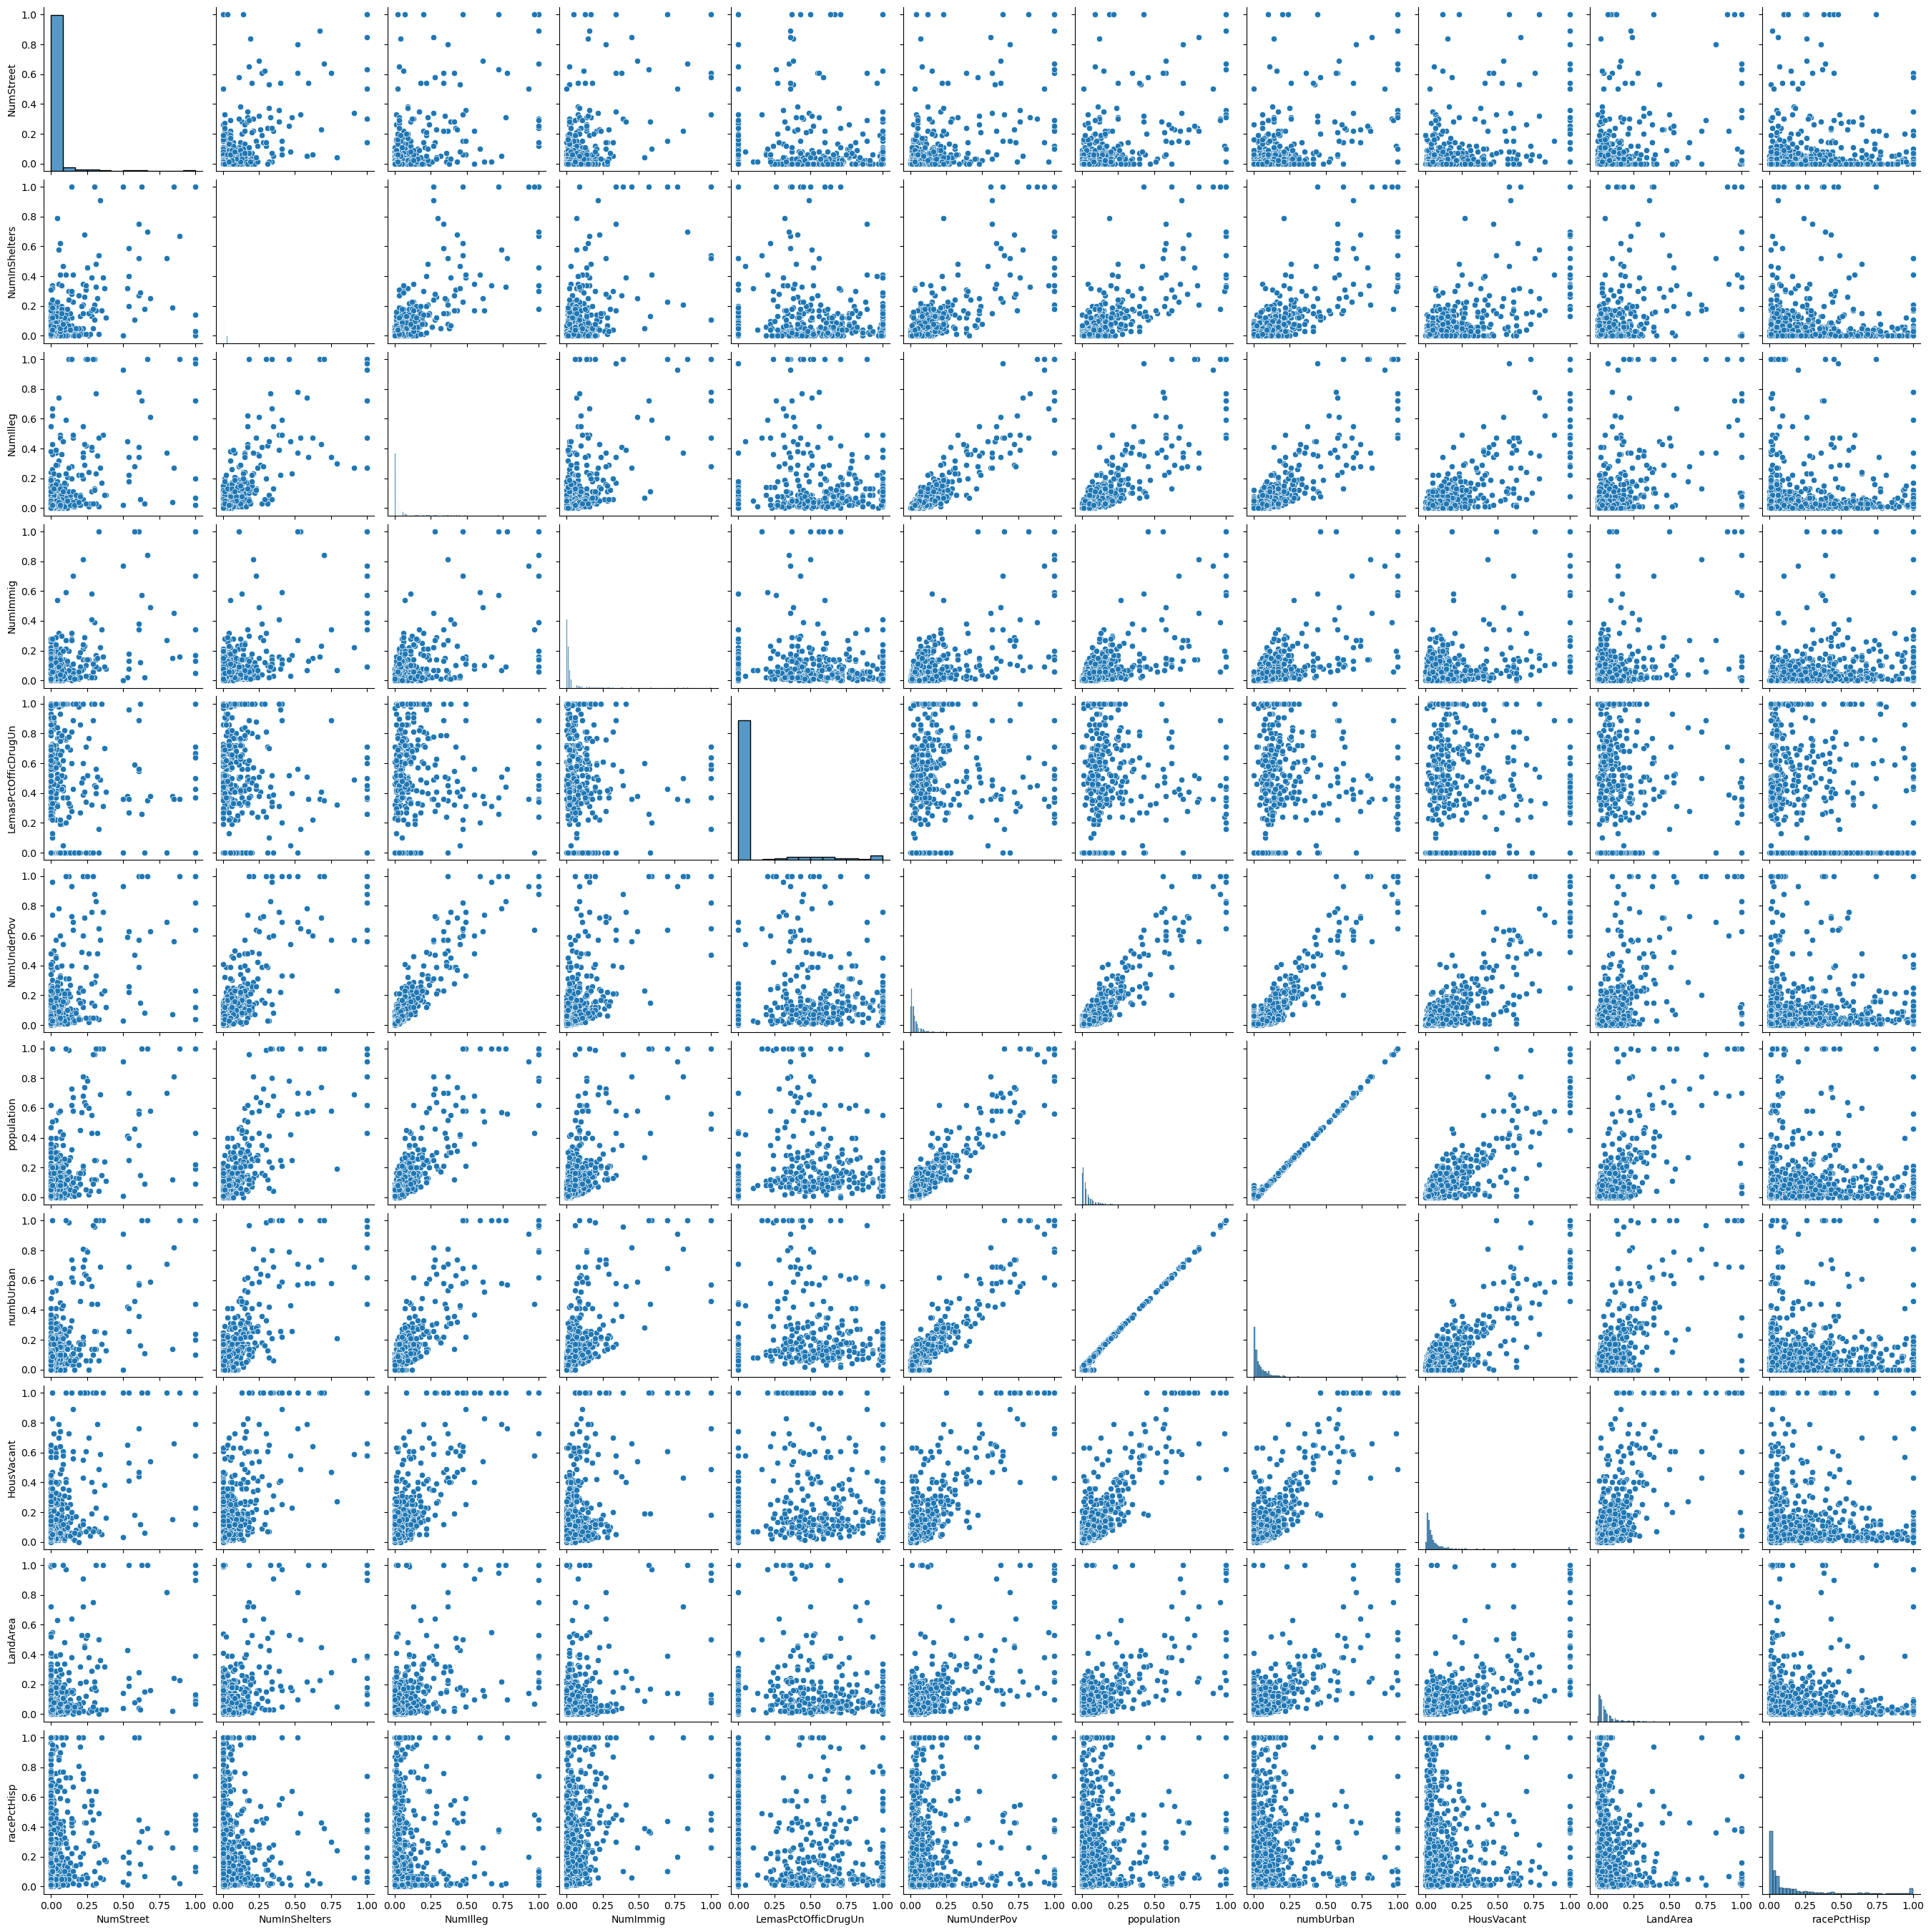

In [28]:
print('------------------------------------------------------------------------')
print('SCATTER PLOT OF 11 FEATURES')
print('------------------------------------------------------------------------')
topN = round(math.sqrt(128))
sortedCVs = sorted(CVList.items(), key=operator.itemgetter(1), reverse=True)
plotData = pd.DataFrame()
for i in range(0, topN):
    featureName = sortedCVs[i][0]
    featureData = communityDataX[featureName]
    plotData = pd.concat([plotData, featureData], axis=1)

sb.pairplot(plotData)

### Analysis:
Scatterplot is used to find out correlation/association between two variables. This scatterplot shows a strong, positive linear association between features 'numbUrban' and 'population'. Also, there is a positive association between features 'population' and 'NumUnderPov'. There is a positive correlation between many features.

## 2. (e) Box plots for highest CV



BOX PLOT OF 11 FEATURES



<AxesSubplot:>

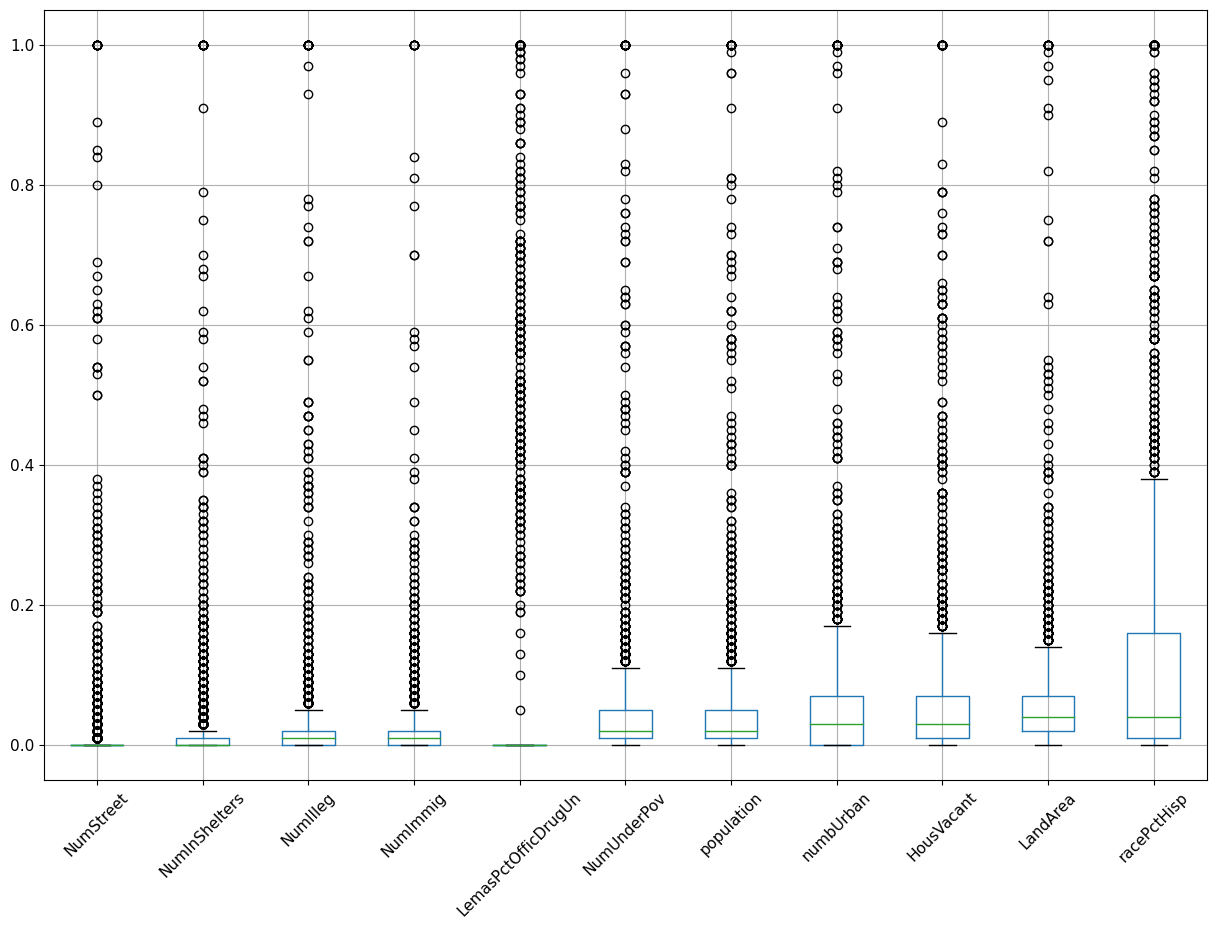

In [29]:
print('\n')
print('BOX PLOT OF 11 FEATURES') 
print('')

plotData.boxplot(rot=45, fontsize=11, figsize=(15, 10))

# 2. (f) Linear model using least squares

In [30]:
OLSLinearModel = LinearRegression()
OLSLinearModel = OLSLinearModel.fit(communityTrainDataX, communityTrainDataY)

OLSPredictedY = OLSLinearModel.predict(communityTestDataX)
OLSPredictedY = OLSPredictedY.flatten()

actualTestDataY = np.array(communityTestDataY).flatten()

OLSMSE = mean_squared_error(actualTestDataY, OLSPredictedY)
OLSMSE = round(OLSMSE, 3)
print('\n')
print('TEST MSE FOR OLS REGRESSION:', OLSMSE)
print('')



TEST MSE FOR OLS REGRESSION: 1.068375849148256e+16



# 2. (g) Ridge regression model on the training set

In [31]:
alphas = 10**np.linspace(10,-2,100)*0.5

ridgeModel = RidgeCV(alphas=alphas, cv=10)
ridgeModel = ridgeModel.fit(communityTrainDataX, communityTrainDataY) 
ridgeBestAlpha = round(ridgeModel.alpha_, 3)
print('\n')
print('BEST ALPHA FOR RIDGE REGRESSION:', ridgeBestAlpha)
print('')

ridgeModel = Ridge(alpha=ridgeBestAlpha)
ridgeModel = ridgeModel.fit(communityTrainDataX, communityTrainDataY) 
ridgePredictedY = ridgeModel.predict(communityTestDataX).flatten()

ridgeMSE = mean_squared_error(actualTestDataY, ridgePredictedY)  
ridgeMSE = round(ridgeMSE, 3)
print('TEST MSE FOR RIDGE REGRESSION:', ridgeMSE)
print('')



BEST ALPHA FOR RIDGE REGRESSION: 2.321

TEST MSE FOR RIDGE REGRESSION: 0.018



# 2. (h) Lasso Regression

In [32]:
alphas = 10**np.linspace(10,-2,100)*0.5

lassoModel = LassoCV(alphas=alphas, cv=10)
lassoModel = lassoModel.fit(communityTrainDataX, np.array(communityTrainDataY).flatten()) 
lassoBestAlpha = round(lassoModel.alpha_, 3)
print('\n')
print('BEST ALPHA FOR LASSO REGRESSION:', lassoBestAlpha)
print('')

lassoModel = Lasso(alpha=lassoBestAlpha)
lassoModel = lassoModel.fit(communityTrainDataX, communityTrainDataY) 
lassoPredictedY = lassoModel.predict(communityTestDataX).flatten()
lassoMSE = mean_squared_error(actualTestDataY, lassoPredictedY) 
lassoMSE = round(lassoMSE, 3)
print('TEST MSE FOR LASSO REGRESSION:', lassoMSE)

print('')
print('FEATURES SELECTED BY LASSO REGRESSION:')
print('')
lassoCoefficients = lassoModel.coef_
tableData = []
for i in range(0, len(lassoCoefficients)):
    if lassoCoefficients[i]!=0:
        row = []
        row.append(features[i])
        tableData.append(row)
tableHeaders = ['Feature Name']
printDatainTable(tableHeaders, tableData)



BEST ALPHA FOR LASSO REGRESSION: 0.005

TEST MSE FOR LASSO REGRESSION: 0.019

FEATURES SELECTED BY LASSO REGRESSION:

+==================+
|   Feature Name   |
+==================+
|   racePctWhite   |
+------------------+
|     pctUrban     |
+------------------+
|  MalePctDivorce  |
+------------------+
|   PctKids2Par    |
+------------------+
|     PctIlleg     |
+------------------+
| PctPersDenseHous |
+------------------+
|    HousVacant    |
+------------------+
| PctVacantBoarded |
+------------------+


# 2. (h) Lasso Regression on Standardized Features.

In [33]:
scaler = preprocessing.StandardScaler()
scaler = scaler.fit(communityDataX)
scaledTrainDataX = scaler.transform(communityTrainDataX)
scaledTestDataX = scaler.transform(communityTestDataX)

alphas = 10**np.linspace(10,-2,100)*0.5

scaledLassoModel = LassoCV(alphas=alphas, cv=10)
scaledLassoModel = scaledLassoModel.fit(scaledTrainDataX, np.array(communityTrainDataY).flatten()) 
scaledLassoBestAlpha = round(scaledLassoModel.alpha_, 3)
print('\n')
print('BEST ALPHA FOR LASSO REGRESSION:', scaledLassoBestAlpha)
print('')

scaledLassoModel = Lasso(alpha=scaledLassoBestAlpha)
scaledLassoModel = scaledLassoModel.fit(scaledTrainDataX, communityTrainDataY) 
scaledLassoPredictedY = scaledLassoModel.predict(scaledTestDataX).flatten()

scaledLassoMSE = mean_squared_error(actualTestDataY, scaledLassoPredictedY)
scaledLassoMSE = round(scaledLassoMSE, 3)
print('TEST MSE FOR LASSO REGRESSION:', scaledLassoMSE)

print('')
print('FEATURES SELECTED BY LASSO REGRESSION ON STANDARDIZED FEATURES:')
print('')
scaledLassoCoefficients = scaledLassoModel.coef_
tableData = []
for i in range(0, len(scaledLassoCoefficients)):
    if scaledLassoCoefficients[i]!=0:
        row = []
        row.append(features[i])
        tableData.append(row)
tableHeaders = ['Feature Name']
printDatainTable(tableHeaders, tableData)



BEST ALPHA FOR LASSO REGRESSION: 0.005

TEST MSE FOR LASSO REGRESSION: 0.017

FEATURES SELECTED BY LASSO REGRESSION ON STANDARDIZED FEATURES:

+=======================+
|     Feature Name      |
+=======================+
|     racepctblack      |
+-----------------------+
|     racePctWhite      |
+-----------------------+
|      agePct12t29      |
+-----------------------+
|       pctUrban        |
+-----------------------+
|      pctWInvInc       |
+-----------------------+
|      pctWPubAsst      |
+-----------------------+
|      pctWRetire       |
+-----------------------+
|      AsianPerCap      |
+-----------------------+
|    MalePctDivorce     |
+-----------------------+
|      PctKids2Par      |
+-----------------------+
|      PctWorkMom       |
+-----------------------+
|       PctIlleg        |
+-----------------------+
|   PctPersDenseHous    |
+-----------------------+
|    PctHousLess3BR     |
+-----------------------+
|      HousVacant       |
+----------------------

In [34]:
tableData = []
row = []
row.append('Ridge Regression without standardization')
row.append(ridgeMSE)
tableData.append(row)
row = []
row.append('Lasso Regression without standardization')
row.append(lassoMSE)
tableData.append(row)
row = []
row.append('Lasso Regression with standardization')
row.append(scaledLassoMSE)
tableData.append(row)
tableHeaders = ['Model', 'Test MSE']
printDatainTable(tableHeaders, tableData)

+==========================================+==========+
|                  Model                   | Test MSE |
+==========================================+==========+
| Ridge Regression without standardization |  0.018   |
+------------------------------------------+----------+
| Lasso Regression without standardization |  0.019   |
+------------------------------------------+----------+
|  Lasso Regression with standardization   |  0.017   |
+------------------------------------------+----------+


### Analysis:
Based on the mean squared error obtained for test data, it can be inferred that standardizing normalized features do not change the MSE much for Lasso regression on normalized features only.

# PCR model on the training set

In [35]:
PCRErrors = {}
for m in range(1, len(features)+1):
    kFolds = KFold(n_splits=10, shuffle=False)
    npTrainDataX = np.array(communityTrainDataX)
    npTrainDataY = np.array(communityTrainDataY)
    cvError = []
    for trainIdx, valIdx in kFolds.split(npTrainDataX, npTrainDataY):
        # Get training data
        trainX = []
        trainY = []
        for idx in trainIdx:
            trainX.append(communityTrainDataX.iloc[idx]) 
            trainY.append(communityTrainDataY.iloc[idx]) 
        trainX = pd.DataFrame(trainX, columns=features)
        trainY = pd.DataFrame(trainY, columns=[response])
        
        # Get validation data
        valX = []
        valY = []
        for idx in valIdx:
            valX.append(communityTrainDataX.iloc[idx]) 
            valY.append(communityTrainDataY.iloc[idx]) 
        valX = pd.DataFrame(valX, columns=features)
        valY = pd.DataFrame(valY, columns=[response])
        
        # Find m principal components
        pca = PCA(n_components=m)
        pca = pca.fit(trainX)
        newTrainX = pca.transform(trainX)
        newValX = pca.transform(valX)
        
        pcrModel = LinearRegression()
        pcrModel = pcrModel.fit(newTrainX, trainY)
        cvPredictedY = pcrModel.predict(newValX).flatten()
        actualValY = np.array(valY).flatten()
        err = mean_squared_error(actualValY, cvPredictedY)  
        err = round(err, 3)
        cvError.append(err)
    PCRErrors[m] = np.mean(cvError)

print('\n')
print('CROSS-VALIDATION MSE FOR DIFFERENT NUMBER OF PRINCIPAL COMPONENTS')
print('-------------------------------------------------------------------')
tableData = []
for k,v in PCRErrors.items():
    row = []
    row.append(k)
    row.append(round(v, 3))
    tableData.append(row)
tableHeaders = ['M', 'Cross-Validation MSE']
printDatainTable(tableHeaders, tableData)



CROSS-VALIDATION MSE FOR DIFFERENT NUMBER OF PRINCIPAL COMPONENTS
-------------------------------------------------------------------
+=====+======================+
|  M  | Cross-Validation MSE |
+=====+======================+
|  1  |        0.038         |
+-----+----------------------+
|  2  |        0.031         |
+-----+----------------------+
|  3  |        0.028         |
+-----+----------------------+
|  4  |        0.024         |
+-----+----------------------+
|  5  |        0.023         |
+-----+----------------------+
|  6  |        0.023         |
+-----+----------------------+
|  7  |         0.02         |
+-----+----------------------+
|  8  |         0.02         |
+-----+----------------------+
|  9  |         0.02         |
+-----+----------------------+
| 10  |         0.02         |
+-----+----------------------+
| 11  |         0.02         |
+-----+----------------------+
| 12  |         0.02         |
+-----+----------------------+
| 13  |         0.02       

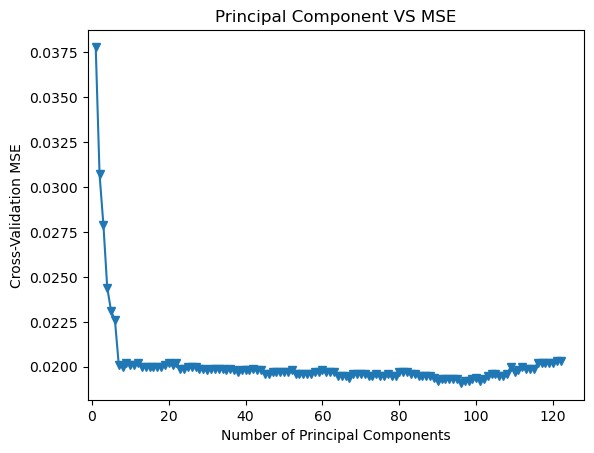

In [36]:
plt.plot(PCRErrors.keys(), PCRErrors.values(), '-v')
plt.xlabel('Number of Principal Components')
plt.xlim(left=-1)
plt.ylabel('Cross-Validation MSE')
plt.title('Principal Component VS MSE')
plt.show()

In [37]:
sortedErrors = sorted(PCRErrors.items(), key=operator.itemgetter(1))
bestM = sortedErrors[0][0]
print('\n')
print('BEST M:', bestM)
print('')



BEST M: 96



In [38]:
finalPCA = PCA(n_components=bestM)
finalPCA = finalPCA.fit(communityTrainDataX)
pcaTrainDataX = finalPCA.transform(communityTrainDataX)
pcaTestDataX = finalPCA.transform(communityTestDataX)

finalPCRModel = LinearRegression()
finalPCRModel = finalPCRModel.fit(pcaTrainDataX, communityTrainDataY)

finalPCRPredictedY = finalPCRModel.predict(pcaTestDataX).flatten()

finalPCRMSE = mean_squared_error(actualTestDataY, finalPCRPredictedY)  
finalPCRMSE = round(finalPCRMSE, 3)
print('\n')
print('TEST MSE FOR PRINCIPAL COMPONENT REGRESSION:', finalPCRMSE)
print('')



TEST MSE FOR PRINCIPAL COMPONENT REGRESSION: 0.018



# 2. (j) L1 penalized gradient boosting tree

In [39]:
numpyTrainX = np.array(communityTrainDataX)
numpyTrainY = np.array(communityTrainDataY)

# Select best alpha for XGBoost
xgbModel = xgb.XGBRegressor(objective='reg:squarederror')
xgbParameters = {'reg_alpha': alphas}
xgbModelValidation = GridSearchCV(xgbModel, xgbParameters, cv=10)
xgbModelValidation = xgbModelValidation.fit(numpyTrainX, numpyTrainY.flatten())

xgbBestAlpha = xgbModelValidation.best_params_['reg_alpha']
xgbBestAlpha = round(xgbBestAlpha, 3)
print('\n')
print('BEST ALPHA FOR XGBOOST:', xgbBestAlpha)

# Fit XGBoost on best alpha selected
finalXGBModel = xgb.XGBRegressor(objective='reg:squarederror', reg_alpha=xgbBestAlpha)
finalXGBModel = finalXGBModel.fit(numpyTrainX, numpyTrainY)

numpyTestX = np.array(communityTestDataX)

xgboostPredictedY = finalXGBModel.predict(numpyTestX)
xgboostMSE = mean_squared_error(actualTestDataY, xgboostPredictedY)
xgboostMSE = round(xgboostMSE, 3)
print('')
print('TEST MSE FOR XGBOOST REGRESSION:', xgboostMSE) 
print('')



BEST ALPHA FOR XGBOOST: 2.321

TEST MSE FOR XGBOOST REGRESSION: 0.017

